In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris=pd.read_csv("user_behavior_dataset.csv");
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the dataset from a CSV file
df=pd.read_csv("user_behavior_dataset.csv")

# Select features and target variable
X = df.drop(columns=['User ID', 'User Behavior Class'])
y = df['User Behavior Class']
X=pd.get_dummies(X)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
# svm = SVC(kernel="rbf", gamma='scale', C=1.0, decision_function_shape='ovr')
svm = SVC(kernel="rbf",C=1.0, decision_function_shape='ovr')
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")


# plt.figure(figsize=(8, 6))
# DecisionBoundaryDisplay.from_estimator(
#     svm,
#     X,
#     response_method="predict",
#     cmap=plt.cm.Spectral,
#     alpha=0.8,
#     xlabel='Sepal Length (cm)',
#     ylabel='Sepal Width (cm)',
# )


# plt.scatter(X[:, 0], X[:, 1], 
#             c=y, 
#             s=20, edgecolors="k", cmap=plt.cm.Spectral)
# plt.colorbar(label='class')
# plt.title('Decision Boundary and Data Points')
# plt.show()



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


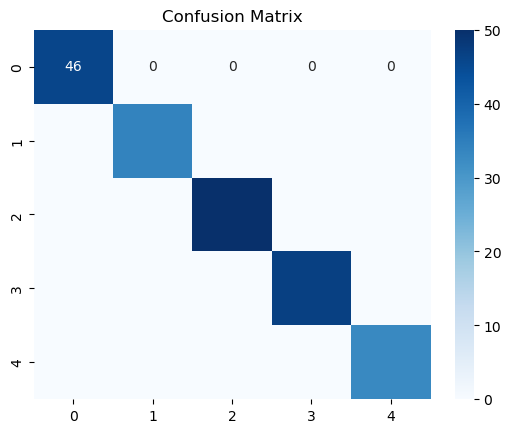

Accuracy: 100.00%


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("user_behavior_dataset.csv");
le = LabelEncoder()
df['Device Model'] = le.fit_transform(df['Device Model'])
df['Operating System'] = le.fit_transform(df['Operating System'])
df['Gender'] = le.fit_transform(df['Gender'])  # 0 for Female, 1 for Male

X = df.drop(columns=['User ID', 'User Behavior Class'])  # Features
y = df['User Behavior Class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

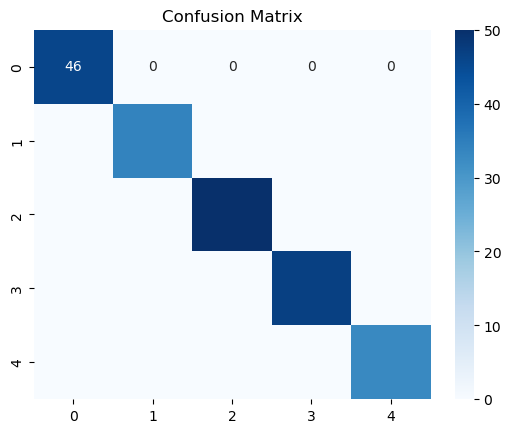

Accuracy: 100.00%


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("user_behavior_dataset.csv")

# Label encoding categorical columns
# le = LabelEncoder()
# df['Device Model'] = le.fit_transform(df['Device Model'])
# df['Operating System'] = le.fit_transform(df['Operating System'])
# df['Gender'] = le.fit_transform(df['Gender'])  # 0 for Female, 1 for Male

# Features and target variable
X = df.drop(columns=['User ID', 'User Behavior Class'])  # Features
y = df['User Behavior Class']  # Target variable
X=pd.get_dummies(X)
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVC model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # Using RBF kernel
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("bank_transactions_data_2.csv")
df

# Features and target variable
# X = df.drop(columns=['User ID', 'User Behavior Class'])  # Features
# y = df['User Behavior Class']  # Target variable
# X=pd.get_dummies(X)
# # Splitting data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Feature scaling
# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # Initialize and train the SVC model
# svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # Using RBF kernel
# svm_model.fit(X_train, y_train)

# # Predictions
# y_pred = svm_model.predict(X_test)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.title('Confusion Matrix')
# plt.show()

# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [19]:
df.columns


Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

Accuracy: 78.12%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.78      1.00      0.88       589

    accuracy                           0.78       754
   macro avg       0.39      0.50      0.44       754
weighted avg       0.61      0.78      0.69       754



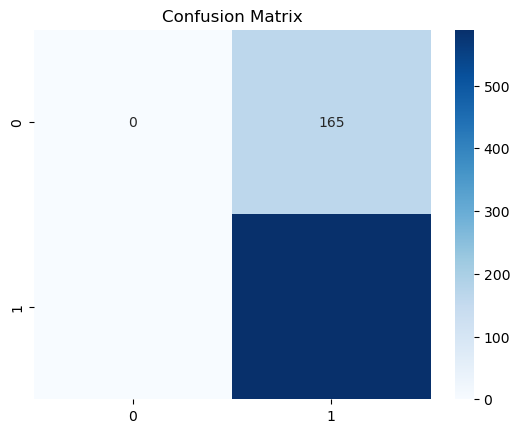

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("bank_transactions_data_2.csv")
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Preprocessing
# Encode categorical columns (e.g., 'TransactionType', 'Location', 'DeviceID', 'Channel', 'CustomerOccupation')
label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['Channel'] = label_encoder.fit_transform(df['Channel'])
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])
scaler = StandardScaler()
numerical_cols = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days
# Drop non-numeric columns that cannot be scaled (e.g., 'TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'IP Address')
X = df[['TransactionAmount', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 
        'LoginAttempts', 'AccountBalance', 'TimeSinceLastTransaction']]
y = df['TransactionType']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features (scaling)

# Initialize SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)

# Train the model
svm_model.fit(X_train, y_train)

# Predict the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("bank_transactions_data_2.csv")

# Preprocessing
# Encode categorical columns
label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['DeviceID'] = label_encoder.fit_transform(df['DeviceID'])
df['Channel'] = label_encoder.fit_transform(df['Channel'])
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])

# Drop non-numeric columns
X = df.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'IP Address'])
y = df['TransactionType']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

# Feature Selection using RFE (Recursive Feature Elimination)
svm_rfe = SVC(kernel='rbf', gamma='scale', C=1.0)
selector = RFE(svm_rfe, n_features_to_select=5)  # Adjust the number of features to select
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Train the model
best_model.fit(X_train_selected, y_train)

# Predict the test data
y_pred = best_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

# Cross-validation to get a better estimate of the model's performance
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")


ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("bank_transactions_data_2.csv")

# Preprocessing
# Encode categorical columns (Location, DeviceID, CustomerOccupation)
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])
df['DeviceID'] = label_encoder.fit_transform(df['DeviceID'])
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])
df['Channel'] = label_encoder.fit_transform(df['Channel'])  # Channel as target variable

# Select relevant features based on analysis
X = df[['TransactionAmount', 'Location', 'DeviceID', 'CustomerAge', 
        'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 
        'AccountBalance', 'PreviousTransactionDate']]
y = df['Channel']  # Target is Channel

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

# Feature Selection using RFE (Recursive Feature Elimination)
best_model = SVC(kernel='rbf', gamma='scale', C=1.0, class_weight='balanced')


# Get the best model
# Train the model
best_model.fit(X_train_scaled, y_train)

# Predict the test data
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report and confusion matrix



Accuracy: 33.16%


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("bank_transactions_data_2.csv")
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['Channel'] = label_encoder.fit_transform(df['Channel'])
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])

df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days
scaler = StandardScaler()
numerical_cols = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df[['TransactionAmount', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TimeSinceLastTransaction']]
y = df['TransactionType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Logistic Regression
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.78      1.00      0.88       589

    accuracy                           0.78       754
   macro avg       0.39      0.50      0.44       754
weighted avg       0.61      0.78      0.69       754

Logistic Regression Accuracy: 0.7811671087533156
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.08      0.14       165
           1       0.79      0.96      0.87       589

    accuracy                           0.77       754
   macro avg       0.59      0.52      0.50       754
weighted avg       0.70      0.77      0.71       754

Random Forest Accuracy: 0.7705570291777188


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       165
           1       0.78      1.00      0.88       589

    accuracy                           0.78       754
   macro avg       0.39      0.50      0.44       754
weighted avg       0.61      0.78      0.69       754

SVM Accuracy: 0.7811671087533156


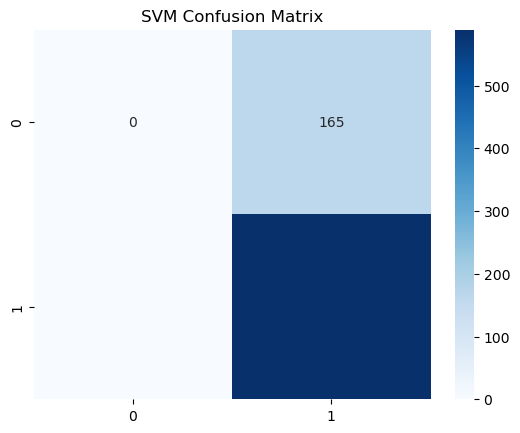

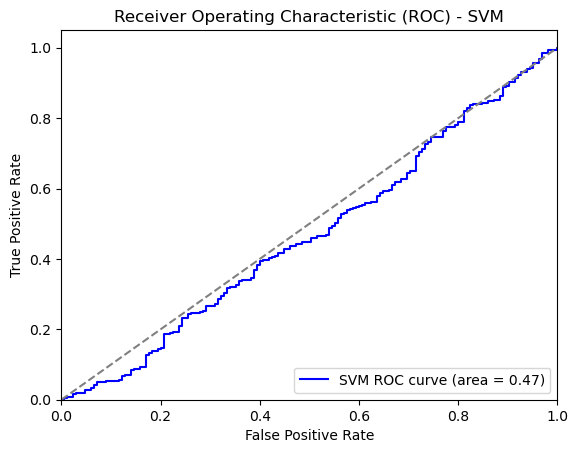

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("bank_transactions_data_2.csv")
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Encode categorical features
label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['Channel'] = label_encoder.fit_transform(df['Channel'])
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])

# Feature engineering
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days

# Feature scaling
scaler = StandardScaler()
numerical_cols = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Select features and target variable
X = df[['TransactionAmount', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 
        'LoginAttempts', 'AccountBalance', 'TimeSinceLastTransaction']]
y = df['TransactionType']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM model (Support Vector Classifier)
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)  # You can tune the parameters
svm_model.fit(X_train, y_train)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test)

# SVM classification report and accuracy
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion matrix and ROC curve (optional)
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('SVM Confusion Matrix')
plt.show()

# ROC Curve and AUC (optional, for binary classification)
# fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test))
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='blue', label='SVM ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) - SVM')
# plt.legend(loc="lower right")
# plt.show()
